<a href="https://colab.research.google.com/github/winstonk6/data_analytics_winter_2022/blob/main/Python/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv', index_col = 0)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 6)

In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
393,Prof,A,33,30,Male,103106
394,Prof,A,31,19,Male,150564
395,Prof,A,42,25,Male,101738
396,Prof,A,25,15,Male,95329
397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
df1 = df[['sex', 'salary']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     397 non-null    object
 1   salary  397 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


Finding the Median salary for all males

In [12]:
males = df1['sex'] == 'Male'
male_median_salary = df1[males]['salary'].median()
print(male_median_salary)

108043.0


Finding the Median salary for all females

In [13]:
females = df1['sex'] == 'Female'
female_median_salary = df1[females]['salary'].median()
print(female_median_salary)

103750.0


Comparing the Mean salary of Males and Females

In [14]:
male_mean_salary = df1[males]['salary'].mean()
female_mean_salary= df1[females]['salary'].mean()

In [15]:
# The difference between mean salaries of male and female
print(male_mean_salary - female_mean_salary)

14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [16]:
df_over20 = df[ df['yrs.service'] > 20 ]

In [17]:
df_over20.describe()

,yrs.since.phd,yrs.service,salary
count,147.000000,147.000000,147.000000
mean,35.061224,31.809524,122103.877551
std,7.968452,8.408519,30313.077914
min,19.000000,21.000000,57800.000000
25%,28.500000,25.000000,100800.000000
50%,35.000000,30.000000,118971.000000
75%,40.000000,38.000000,142875.000000
max,56.000000,60.000000,231545.000000


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [18]:
df_under20 = df[ df['yrs.service'] < 20 ]
df_over20['salary'].mean() - df_under20['salary'].mean()

14163.373384353748

People who have salary of greater than or equal to 200,000

In [19]:
df[ df['salary'] >= 200000 ].describe()

,yrs.since.phd,yrs.service,salary
count,3.000000,3.000000,3.000000
mean,36.666667,29.333333,213681.666667
std,7.094599,19.502137,15488.270024
min,29.000000,7.000000,204000.000000
25%,33.500000,22.500000,204750.000000
50%,38.000000,38.000000,205500.000000
75%,40.500000,40.500000,218522.500000
max,43.000000,43.000000,231545.000000


Your Findings here...


# Rename values, subset columns, etc

In [20]:
df.rename(columns={'Unnamed: 0': 'csv_index'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.7+ KB


In [21]:
df2 = df[['rank', 'yrs.service', 'salary']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         397 non-null    object
 1   yrs.service  397 non-null    int64 
 2   salary       397 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.4+ KB


# Create some simple visualizations showing some simple statistics

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

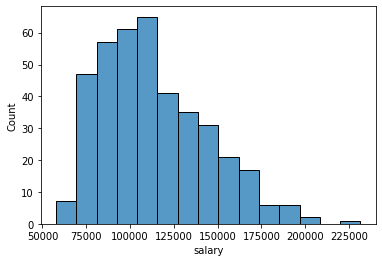

<Figure size 432x288 with 0 Axes>

In [23]:
sns.histplot(data=df, x='salary')
plt.figure()

<Figure size 432x288 with 0 Axes>

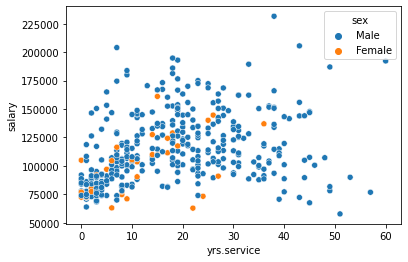

<Figure size 432x288 with 0 Axes>

In [24]:
sns.scatterplot(data=df, x='yrs.service', y='salary', hue='sex')
plt.figure()

<Figure size 432x288 with 0 Axes>

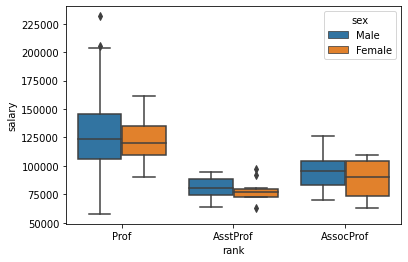

<Figure size 432x288 with 0 Axes>

In [25]:
sns.boxplot(data=df, x='rank', y='salary', hue='sex')
plt.figure()

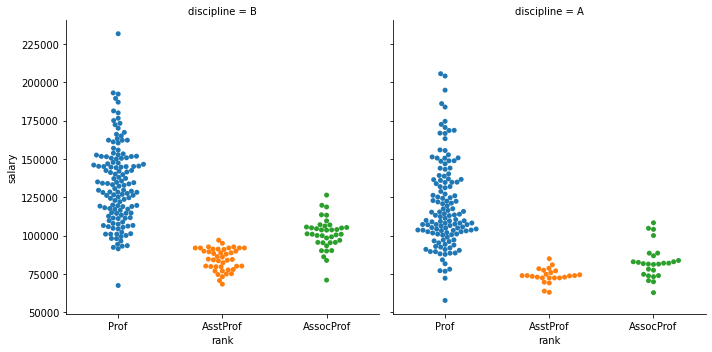

In [26]:
sns.catplot(data=df, x='rank', y='salary', kind='swarm', col='discipline')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:



*   Most of the salaries are between 75,000 to 150,000.
*   Women make up a small proportion of the dataset, and women tend to earn less than men.
*   People with discipline B tend to earn more than people in discipline A.